In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import silhouette_score


In [36]:
data = pd.read_csv('../data/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [37]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [38]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [39]:
scaler = StandardScaler()
numeric_features = [ 'Annual Income (k$)', 'Spending Score (1-100)']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [40]:
data=data.drop(['CustomerID'],axis=1)

In [41]:
# remove outlier by clipping
def remove_outlier_clipping(dataframe,lower_quantile,upper_quantile):
    df=dataframe.copy()
    for col in df.columns:
        if df[col].dtype != 'object':
            df[col] = df[col].clip(lower=df[col].quantile(lower_quantile), upper=df[col].quantile(upper_quantile))
    return df

<Axes: >

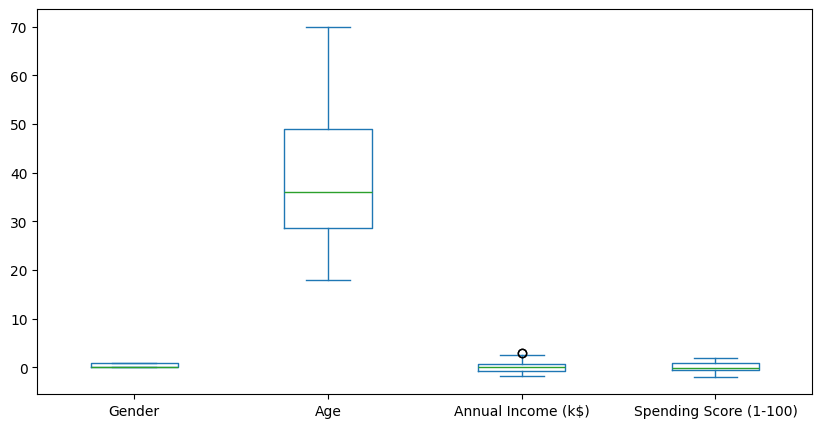

In [42]:
data.plot(kind="box",figsize=(10,5))

<Axes: >

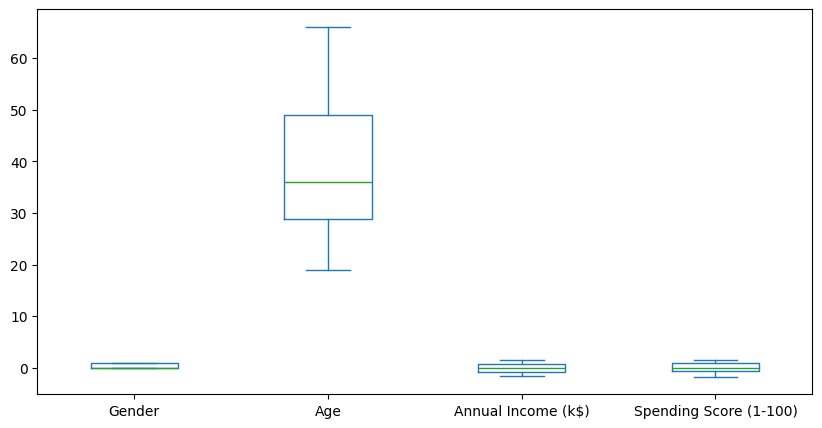

In [43]:
data = remove_outlier_clipping(data,0.05,0.95)
data.plot(kind="box",figsize=(10,5))

In [44]:
inertia = []
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
for i in range(1, 11):  # Testing for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


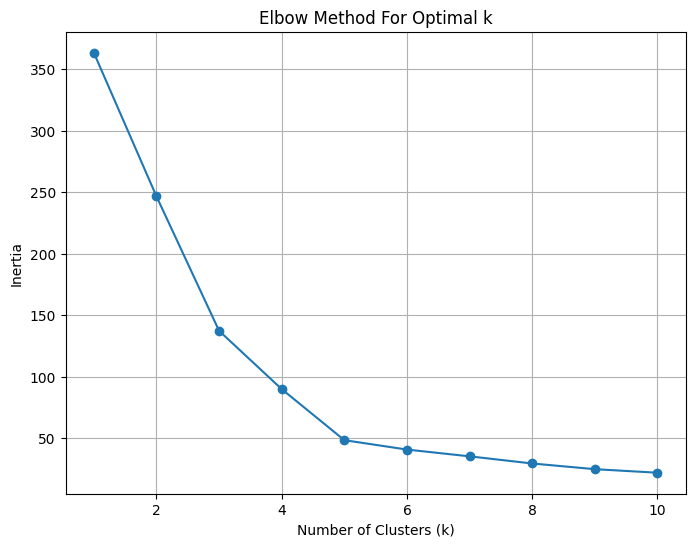

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


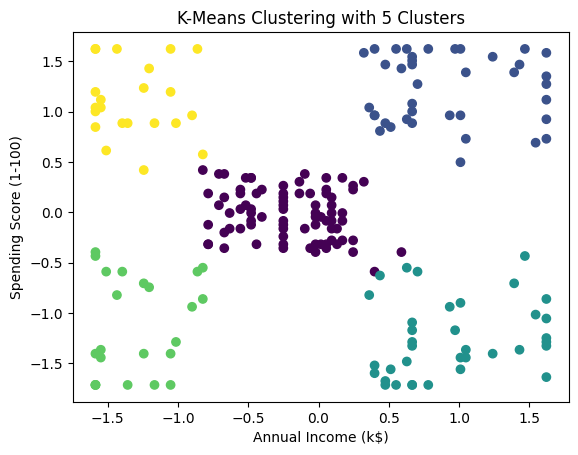

In [46]:
optimal_k = 5   # Change this based on your elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(X)


# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [47]:
# Calculate inertia
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')


Inertia: 48.40924629695117


In [48]:

# Calculate Silhouette Score
sil_score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.5782123875361991


In [49]:
# Display the cluster centers
centroids = kmeans.cluster_centers_
print("Cluster Centers:\n", centroids)


Cluster Centers:
 [[-0.2088822  -0.01892551]
 [ 0.90937197  1.22158511]
 [ 0.94876478 -1.25221101]
 [-1.29092329 -1.12346221]
 [-1.31219558  1.10570863]]


In [50]:
labels= kmeans.labels_
data['Cluster'] = labels
print(data)

     Gender   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0         1  19.0           -1.586321               -0.434801        3
1         1  21.0           -1.586321                1.195704        4
2         0  20.0           -1.586321               -1.715913        3
3         0  23.0           -1.586321                1.040418        4
4         0  31.0           -1.586321               -0.395980        3
..      ...   ...                 ...                     ...      ...
195       0  35.0            1.619911                1.118061        1
196       0  45.0            1.619911               -0.861839        2
197       1  32.0            1.619911                0.923953        1
198       1  32.0            1.619911               -1.250054        2
199       1  30.0            1.619911                1.273347        1

[200 rows x 5 columns]


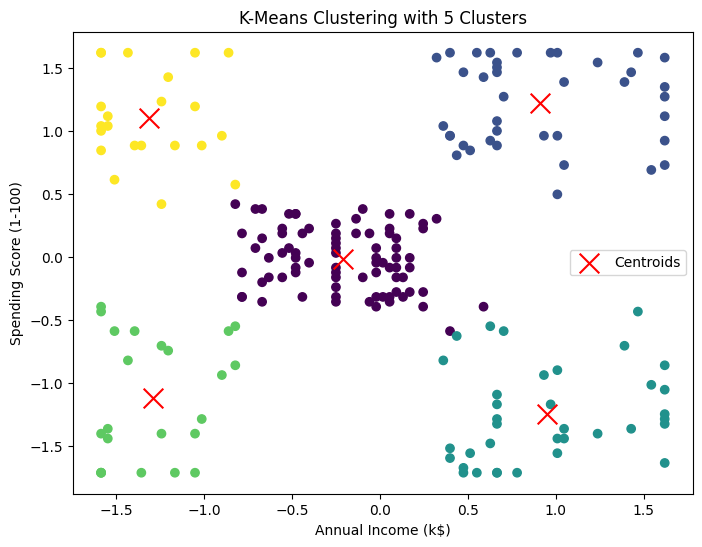

In [51]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [52]:
# Create a DataFrame with average values for each cluster
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.412500  42.730625           -0.208882               -0.018926
1        0.461538  32.692308            0.909372                1.221585
2        0.527778  40.666667            0.948765               -1.252211
3        0.391304  45.176087           -1.290923               -1.123462
4        0.409091  25.318182           -1.312196                1.105709
